In [11]:
# numpy 로드하여 np로 사용
# pandas 로드하여 pd로 사용
# matplotlib.pyplot 로드하여 plt로 사용
# seaborn 로드하여 sns로 사용
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [12]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop) # 폰트이름 확인하기

Malgun Gothic


In [13]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font', family=font_prop)

### Mcdonalds_data.csv 의 데이터 확인

In [14]:
import pandas as pd

# 상대경로 기준: check.ipynb → code/visualization/ → ../ → ../ → data/
df = pd.read_csv("../../data/Mcdonalds_data.csv")

# 데이터 확인
print(df.head())
print(df.columns)

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

### DataFrame 추출 코드
* 카테고리
* 아이템명
* 사이즈 (g 단위만)
* 칼로리
* 탄수화물
* 지방
* 단백질
* 데일리 탄수화물
* 데일리 지방
* 데일리 단백질
* 당류
* 나트륨
* 데일리 나트륨
* 식이섬유
* 데일리 식이섬유

In [15]:
import pandas as pd
import re

# 데이터 로드
# df = pd.read_csv("../../data/Mcdonalds_data.csv")

# Serving Size에서 g값 추출 (있으면 정수, 없으면 원래 텍스트)
def parse_size(text):
    match = re.search(r"\((\d+)\s*g\)", text)
    if match:
        return int(match.group(1))  # 숫자만 정수로 반환
    else:
        return text.strip()         # g 없으면 원래 값 그대로 반환

# 새 컬럼 생성
df["Size (g)"] = df["Serving Size"].apply(parse_size)

# 최종 사용할 컬럼 목록
selected_columns = [
    "Category",
    "Item",
    "Size (g)",
    "Calories",
    "Carbohydrates",
    "Total Fat",
    "Protein",
    "Carbohydrates (% Daily Value)",
    "Total Fat (% Daily Value)",
    "Sugars",
    "Sodium",
    "Sodium (% Daily Value)",
    "Dietary Fiber",
    "Dietary Fiber (% Daily Value)"
]

# 필요한 컬럼만 추출
df_final = df[selected_columns].reset_index(drop=True)

# 확인
# print(df_final.head())

df_final.tail(20)

,Category,Item,Size (g),Calories,Carbohydrates,Total Fat,Protein,Carbohydrates (% Daily Value),Total Fat (% Daily Value),Sugars,Sodium,Sodium (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value)
240,Smoothies & Shakes,Mango Pineapple Smoothie (Large),22 fl oz cup,340,78,1.0,4,26,2,72,60,3,2,6
241,Smoothies & Shakes,Vanilla Shake (Small),12 fl oz cup,530,86,15.0,11,29,24,63,160,7,0,0
242,Smoothies & Shakes,Vanilla Shake (Medium),16 fl oz cup,660,109,19.0,14,36,29,81,200,9,0,0
243,Smoothies & Shakes,Vanilla Shake (Large),22 fl oz cup,820,135,23.0,18,45,35,101,260,11,0,0
244,Smoothies & Shakes,Strawberry Shake (Small),12 fl oz cup,550,90,16.0,12,30,25,79,160,7,0,0
245,Smoothies & Shakes,Strawberry Shake (Medium),16 fl oz cup,690,114,20.0,15,38,30,100,210,9,0,0
246,Smoothies & Shakes,Strawberry Shake (Large),22 fl oz cup,850,140,24.0,18,47,36,123,260,11,0,0
247,Smoothies & Shakes,Chocolate Shake (Small),12 fl oz cup,560,91,16.0,12,30,25,77,240,10,1,5
248,Smoothies & Shakes,Chocolate Shake (Medium),16 fl oz cup,700,114,20.0,15,38,30,97,300,13,2,6
249,Smoothies & Shakes,Chocolate Shake (Large),22 fl oz cup,850,141,23.0,19,47,36,120,380,16,2,8


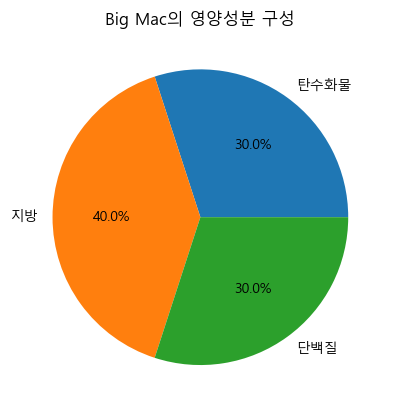

In [16]:
# 한글폰트 테스트용 코드
plt.pie([30, 40, 30], labels=["탄수화물", "지방", "단백질"], autopct='%1.1f%%')
plt.title("Big Mac의 영양성분 구성")
plt.show()

## 특정 메뉴를 입력하여 barplot을 통해 시각화
- 추후 유저가 streamlit에서 메뉴를 선택하면 시각화된 이미지가 출력되어야 함
- 유저가 메뉴명을 한글로 선택하면 해당 메뉴를 영어로 데이터에 입력하게 하여야함
- 한글 <> 영어 메뉴명 매핑 딕셔너리를 통해 처리할 예정

C:\Users\user\AppData\Local\Temp\ipykernel_30280\2745924100.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="영양소", y="함량 (g 기준)", palette="pastel")


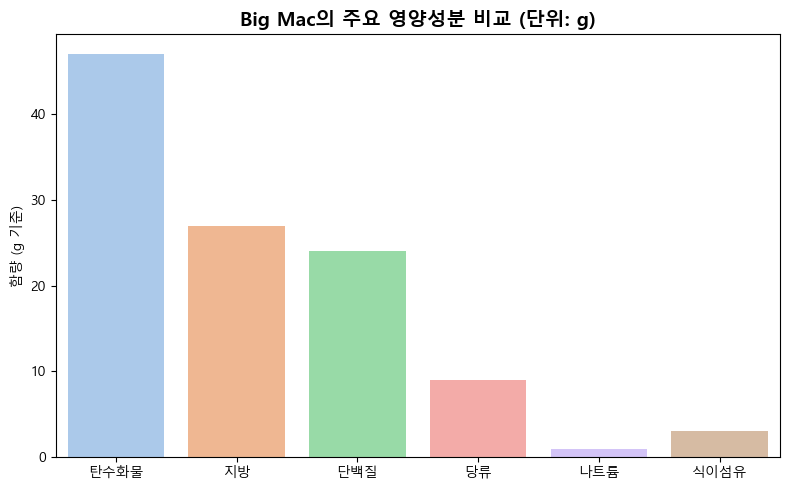

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns

# ✅ 한글 폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# ✅ 사용자 선택 메뉴
selected_item = "Big Mac"

# ✅ 해당 메뉴 데이터 추출
menu_data = df_final[df_final["Item"] == selected_item].iloc[0]

# ✅ 시각화 항목 정의
labels = ["탄수화물", "지방", "단백질", "당류", "나트륨", "식이섬유"]
values = [
    menu_data["Carbohydrates"],
    menu_data["Total Fat"],
    menu_data["Protein"],
    menu_data["Sugars"],
    menu_data["Sodium"] / 1000,  # mg → g 환산
    menu_data["Dietary Fiber"]
]

# ✅ 데이터프레임으로 변환 (시각화에 적합하게)
plot_df = pd.DataFrame({
    "영양소": labels,
    "함량 (g 기준)": values
})

# ✅ 시각화: 세로 barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="영양소", y="함량 (g 기준)", palette="pastel")

# ✅ 제목 설정
plt.title(f"{selected_item}의 주요 영양성분 비교 (단위: g)", fontsize=14, weight='bold')
plt.xlabel("")
plt.ylabel("함량 (g 기준)")
plt.tight_layout()
plt.show()
